<a href="https://colab.research.google.com/github/malgsujd28/data-science/blob/main/klasteryzacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
from sklearn import datasets
from sklearn import manifold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_diabetes

# Dla iris

In [ ]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.drop('Type', axis=1, inplace=True)

iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
scaler = StandardScaler()
iris_data = scaler.fit_transform(iris_data)

# WYKRES ŁOKCIOWY

<Axes: xlabel='k', ylabel='squared error'>

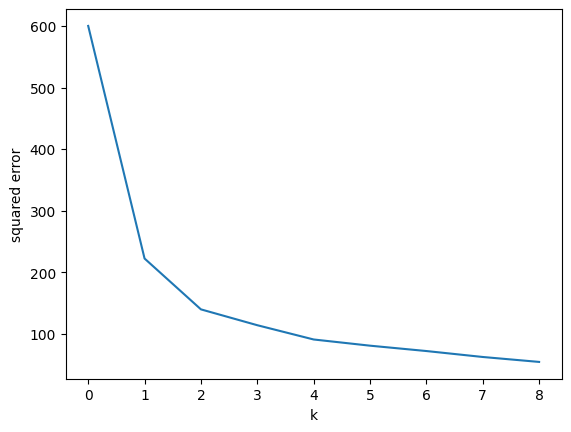

In [ ]:
list_empty = []
for i in range(1,10):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(iris_data)
  list_empty.append(km.inertia_)

plt.xlabel("k")
plt.ylabel('squared error')
pd.Series(list_empty).plot() #wykres łokciowy

Z wykresu łokciowego wynika, że optymalną liczbą klastrów może być 1,2 lub 4, ponieważ tam widoczne są łokcie. Największy zdaje się on być w k=2.

# WYKRES SILHOUETTE

2


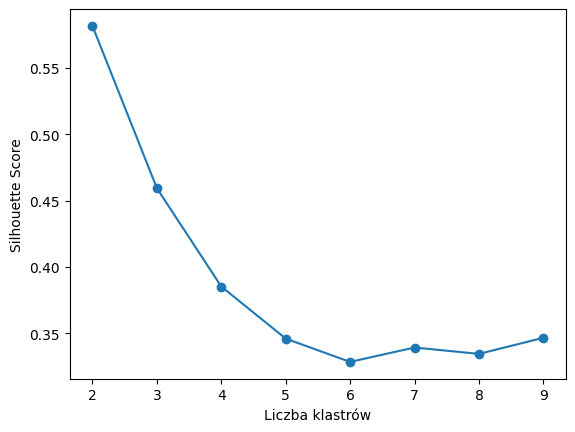

In [ ]:
list_empty = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(iris_data)
    silhouette_average = silhouette_score(iris_data, labels)
    list_empty.append((k, silhouette_average))

best_k = max(list_empty, key=lambda x: x[1])[0]
print(best_k)

plt.plot([k for k, s in list_empty], [s for k, s in list_empty], marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.show()

Wykres silhouette zdaje się potwierdzać wcześniejszą teze, o odpowiednim k wynoszącym 2, ponieważ liczba klastrów równa 2 jest na wykresie silhouette najwyższa.

Wykres łokciowy wypłaszcza się na k = 2, więc jest to optymalna liczba klastrów

# KLASTERYZACJA

In [ ]:
model = KMeans(n_clusters=2, n_init=10)

model.fit(iris_data)

KMeans(n_clusters=4, n_init=10)

In [ ]:
print('Labele:')
print(model.labels_)
print('       ')
print('Centra klastrów:')
print(model.cluster_centers_)

pred1=model.labels_

Labele:
[1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 1 3 3 3 1 1 1 3 3 1 1 1 3 3 1
 1 3 1 1 3 3 1 1 3 1 3 1 3 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
       
Centra klastrów:
[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-0.74922133  1.43007001 -1.29759846 -1.22142131]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]
 [-1.35230687  0.11914427 -1.31439133 -1.29749445]]


In [ ]:
iris_data = pd.DataFrame(iris_data)
iris_data['no_cluster'] = pred1

In [ ]:
iris_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'type']
iris_data

,sepal length,sepal width,petal length,petal width,type
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,3
2,-1.385353,0.328414,-1.397064,-1.315444,3
3,-1.506521,0.098217,-1.283389,-1.315444,3
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,0
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


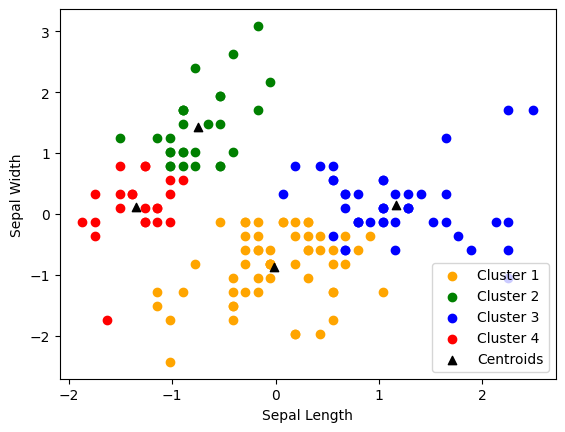

In [ ]:
iris1 = iris_data[iris_data['type'] == 0]
iris2 = iris_data[iris_data['type'] == 1]


plt.scatter(iris1['sepal length'], iris1['sepal width'], color='orange', label='Cluster 1')
plt.scatter(iris2['sepal length'], iris2['sepal width'], color='green', label='Cluster 2')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black', marker='^', label='Centroids')
plt.ylabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.legend()
plt.show()

# Dla wine

In [ ]:
wine = load_wine()
wine_data =pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
wine_data.drop('target', axis=1, inplace=True)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

# WYKRES ŁOKCIOWY

<Axes: xlabel='k', ylabel='squared error'>

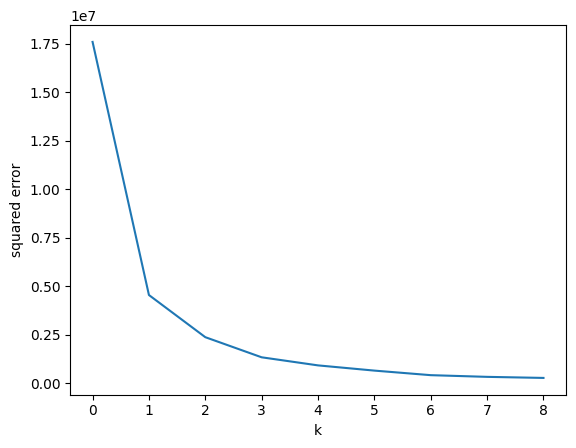

In [ ]:
list_empty = []
for i in range(1,10):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(wine_data)
  list_empty.append(km.inertia_)

plt.xlabel("k")
plt.ylabel('squared error')
pd.Series(list_empty).plot() #wykres łokciowy

Dla zbioru z winem, również najbardziej uwidaczniającym się łokciem zdaje się być punkt k=2.

# WYKRES SILHOUETTE

2


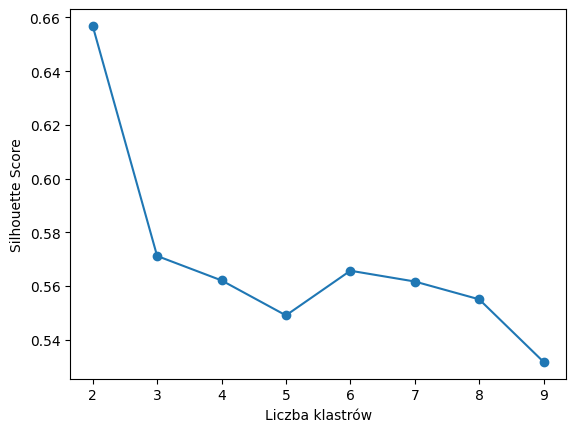

In [ ]:
list_empty = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(wine_data)
    silhouette_average = silhouette_score(wine_data, labels)
    list_empty.append((k, silhouette_average))

best_k = max(list_empty, key=lambda x: x[1])[0]
print(best_k)

plt.plot([k for k, s in list_empty], [s for k, s in list_empty], marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.show()

Ponownie wykres silhouette zdaje się potwierdzać to, że wcześniej przez nas założona optymalna liczba klastrów równa 2 jest prawidłowa, ponieważ i tutaj 2 ma zdecydowanie najwyższy wynik.

odpowiednią liczbą klastrów jest 2

In [ ]:
wine_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
wine_data = scaler.fit_transform(wine_data)

# KLASTERYZACJA

In [ ]:
model=KMeans(n_clusters=2, n_init=10)
model.fit_predict(wine_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
print("labels")
print(model.labels_)
print("\n cluster centers")
print(model.cluster_centers_)

labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 cluster centers
[[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]


In [ ]:
wine_data = pd.DataFrame(wine_data)
wine_data['no_cluster'] = model.labels_
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,no_cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


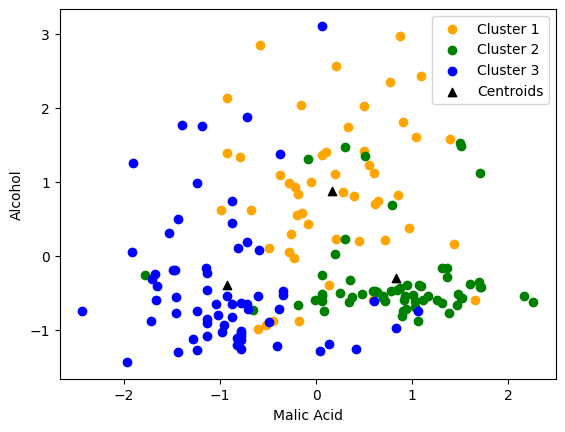

In [ ]:
alco1 = wine_data[wine_data['no_cluster'] == 0]
alco2 = wine_data[wine_data['no_cluster'] == 1]


plt.scatter(alco1[0], alco1[1], color='orange', label='Cluster 1')
plt.scatter(alco2[0], alco2[1], color='green', label='Cluster 2')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black', marker='^', label='Centroids')
plt.ylabel('Alcohol')
plt.xlabel('Malic Acid')
plt.legend()
plt.show()

In [ ]:
wine_data.columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'no_cluster']

In [ ]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,no_cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


In [ ]:
from sklearn import metrics

print("Sihouette Score: %0.3f"
      % metrics.silhouette_score(wine_data,model.fit_predict(wine_data)))

Sihouette Score: 0.313


# Dla diabetes

In [ ]:
diabetes = datasets.load_diabetes()
diabetes_data = pd.DataFrame(diabetes.data)
diabetes_data.columns = diabetes.feature_names

diabetes_data.head()


#s1: Total serum cholesterol (tc)
#s2: Low-density lipoproteins (ldl)
#s3: High-density lipoproteins (hdl)
#s4: Total cholesterol / HDL (tch)
#s5: Possibly log of serum triglycerides level (ltg)
#s6: Blood sugar level (glu)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
scaler = StandardScaler()
diabetes_data = scaler.fit_transform(diabetes_data)
diabetes_data

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

# WYKRES ŁOKCIOWY

<Axes: xlabel='k', ylabel='squared error'>

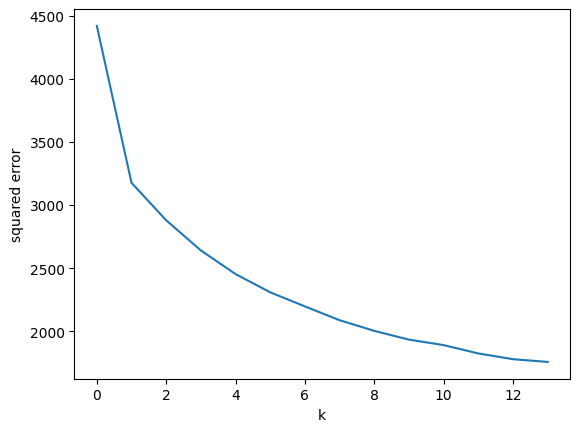

In [ ]:
list_empty = []
for i in range(1,15):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(diabetes_data)
  list_empty.append(km.inertia_)

plt.xlabel("k")
plt.ylabel('squared error')
pd.Series(list_empty).plot()

Dla zbioru diabetes optymalnym k zdaje się być 1, ponieważ to w nim jest najbardziej zauważalny łokieć.


# WYKRES SILHOUETTE

2


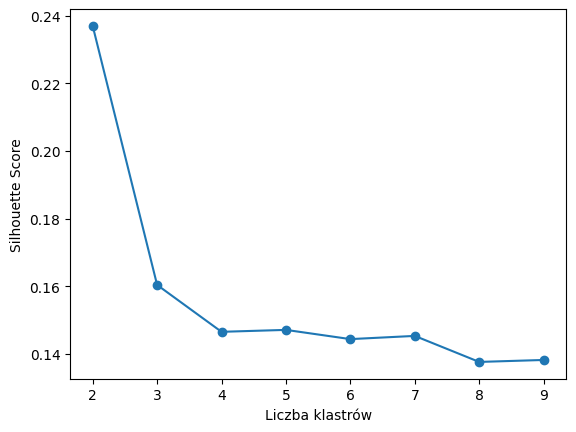

In [ ]:
list_empty = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(diabetes_data)
    silhouette_average = silhouette_score(diabetes_data, labels)
    list_empty.append((k, silhouette_average))

best_k = max(list_empty, key=lambda x: x[1])[0]
print(best_k)

plt.plot([k for k, s in list_empty], [s for k, s in list_empty], marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.show()

Tym razem silhouette score nie pokrywa się idealnie z zakładaną przez nas optymalną liczbą klastrów, ponieważ sugeruje iż 2 będzie bardziej odpowiednią liczbą klastrów (najwyższy wynik na tym wykresie).

Decydujemy się więc na klasteryzacje z wykorzystaniem 2 klastrów.

# KLASTERYZACJA

In [ ]:
model = KMeans(n_clusters=2, n_init=10)

model.fit(diabetes_data)

KMeans(n_clusters=2, n_init=10)

In [ ]:
print("labels")
print(model.labels_)
print("\n cluster centers")
print(model.cluster_centers_)
pred3=model.labels_

labels
[1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0]

 cluster centers
[[-0.3753799  -0.33920204 -0.52913521 -0.46049397 -0.54192468 -0.57970421
   0

In [ ]:
diabetes_data = pd.DataFrame(diabetes_data)
diabetes_data['no_cluster'] = pred3
diabetes_data.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'type']
diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,type
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,1
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,1
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,1
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508,1
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254,1
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674,0
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154,1


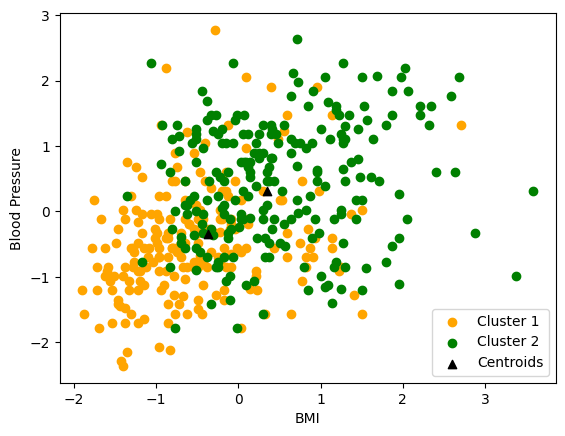

In [ ]:
diabetes1 = diabetes_data[diabetes_data['type'] == 0]
diabetes2 = diabetes_data[diabetes_data['type'] == 1]

plt.scatter(diabetes1['bmi'], diabetes1['bp'], color='orange', label='Cluster 1')
plt.scatter(diabetes2['bmi'], diabetes2['bp'], color='green', label='Cluster 2')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black', marker='^', label='Centroids')

plt.ylabel('Blood Pressure')
plt.xlabel('BMI')

plt.legend()

plt.show()

# Zadanie 2

In [ ]:
from sklearn.datasets import make_moons

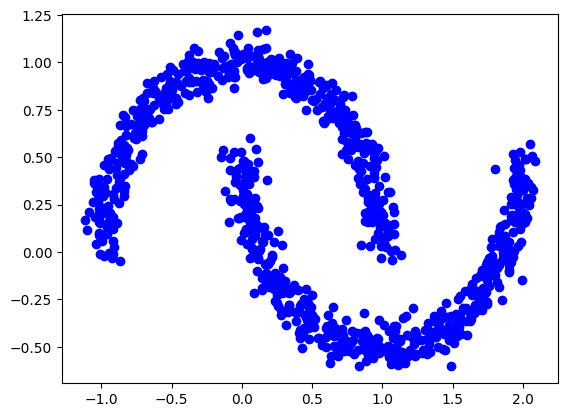

In [ ]:
#stworzenie podobnego wykresu
raw_data, _ = make_moons (n_samples=1000, noise=0.06, random_state=50)
plt.scatter(raw_data[:, 0], raw_data[:, 1], c="blue")
#plt.show()

In [ ]:
#Wykorzystując wszystkie poznane do tej pory algorytmy klasteryzacyjne proszę podjąć kilka prób dopasowania jak najlepszego modelu , za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk.

1. Kmeans
2. Kmedoids
3. Aglomeracyjna
4. Gęstościowa

In [ ]:
scaler = StandardScaler()
raw_data = scaler.fit_transform(raw_data)

# Kmeans

<Axes: xlabel='k', ylabel='squared error'>

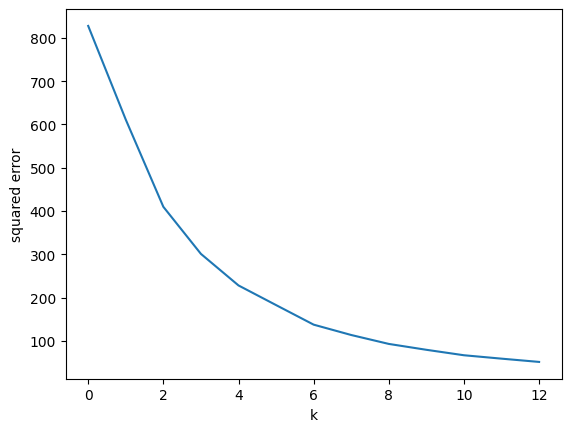

In [ ]:
list_empty = []
for i in range(2, 15):
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(raw_data)
    list_empty.append(km.inertia_)

plt.xlabel("k")
plt.ylabel('squared error')
pd.Series(list_empty).plot()

10


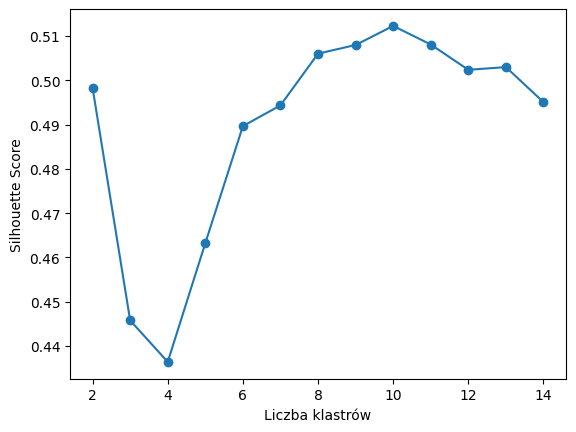

In [ ]:
list_empty = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(raw_data)
    silhouette_average = silhouette_score(raw_data, labels)
    list_empty.append((k, silhouette_average))

best_k = max(list_empty, key=lambda x: x[1])[0]
print(best_k)

plt.plot([k for k, s in list_empty], [s for k, s in list_empty], marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.show()

Odpowiednia ilość klastrów to 10



In [ ]:
km = KMeans(n_clusters=10, random_state=42)
km.fit(raw_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [ ]:
labels = km.labels_
raw_data_scatter = pd.DataFrame(raw_data)
raw_data_scatter['x'] = labels
raw_data_scatter

,0,1,no_clutter
0,-1.004196,1.154097,1
1,-1.757214,0.249628,5
2,1.326731,-0.923776,2
3,0.582999,-0.113334,7
4,1.792016,0.183571,4
...,...,...,...
995,-0.875496,1.470151,1
996,0.261172,0.753221,3
997,1.530026,-0.620224,2
998,-1.736907,-0.522161,5


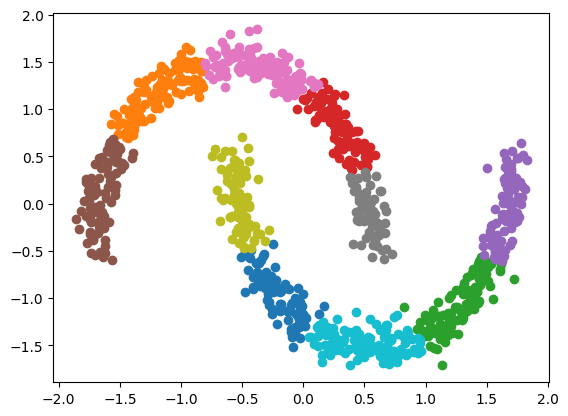

In [ ]:
raw_data_scatter1 = raw_data_scatter[raw_data_scatter['x'] == 0]
plt.scatter(raw_data_scatter1[0], raw_data_scatter1[1])
raw_data_scatter2 = raw_data_scatter[raw_data_scatter['x'] == 1]
plt.scatter(raw_data_scatter2[0], raw_data_scatter2[1])
raw_data_scatter3 = raw_data_scatter[raw_data_scatter['x'] == 2]
plt.scatter(raw_data_scatter3[0], raw_data_scatter3[1])
raw_data_scatter4 = raw_data_scatter[raw_data_scatter['x'] == 3]
plt.scatter(raw_data_scatter4[0], raw_data_scatter4[1])
raw_data_scatter5 = raw_data_scatter[raw_data_scatter['x'] == 4]
plt.scatter(raw_data_scatter5[0], raw_data_scatter5[1])
raw_data_scatter6 = raw_data_scatter[raw_data_scatter['x'] == 5]
plt.scatter(raw_data_scatter6[0], raw_data_scatter6[1])
raw_data_scatter7 = raw_data_scatter[raw_data_scatter['x'] == 6]
plt.scatter(raw_data_scatter7[0], raw_data_scatter7[1])
raw_data_scatter8 = raw_data_scatter[raw_data_scatter['x'] == 7]
plt.scatter(raw_data_scatter8[0], raw_data_scatter8[1])
raw_data_scatter9 = raw_data_scatter[raw_data_scatter['x'] == 8]
plt.scatter(raw_data_scatter9[0], raw_data_scatter9[1])
raw_data_scatter10 = raw_data_scatter[raw_data_scatter['x'] == 9]
plt.scatter(raw_data_scatter10[0], raw_data_scatter10[1])
plt.show()

In [ ]:
silhouette_avg = silhouette_score(raw_data, km.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.512


# Kmedoids

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

<Axes: xlabel='k', ylabel='squared error'>

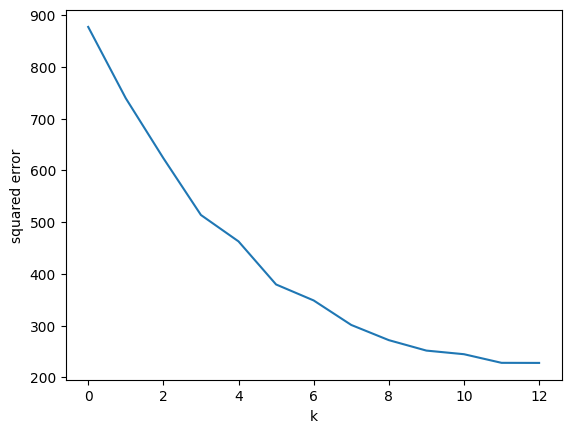

In [ ]:
list_empty = []
for i in range(2, 15):
    km = KMedoids(n_clusters=i, random_state=42)
    km.fit(raw_data)
    list_empty.append(km.inertia_)

plt.xlabel("k")
plt.ylabel('squared error')
pd.Series(list_empty).plot()

10


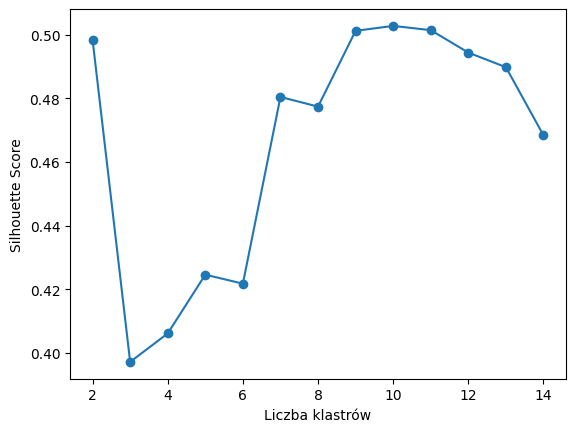

In [ ]:
list_empty = []
for k in range(2, 15):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    labels = kmedoids.fit_predict(raw_data)
    silhouette_average = silhouette_score(raw_data, labels)
    list_empty.append((k, silhouette_average))

best_k = max(list_empty, key=lambda x: x[1])[0]
print(best_k)

plt.plot([k for k, s in list_empty], [s for k, s in list_empty], marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.show()

Opowiednią ilością klastrów jest 10

In [ ]:
km = KMedoids(n_clusters=10, random_state=42)
km.fit(raw_data)

KMedoids(n_clusters=10, random_state=42)

In [ ]:
labels = km.labels_
raw_data_scatter = pd.DataFrame(raw_data)
raw_data_scatter['x'] = labels
raw_data_scatter

,0,1,no_clutter
0,-1.004196,1.154097,8
1,-1.757214,0.249628,6
2,1.326731,-0.923776,5
3,0.582999,-0.113334,3
4,1.792016,0.183571,9
...,...,...,...
995,-0.875496,1.470151,0
996,0.261172,0.753221,7
997,1.530026,-0.620224,5
998,-1.736907,-0.522161,6


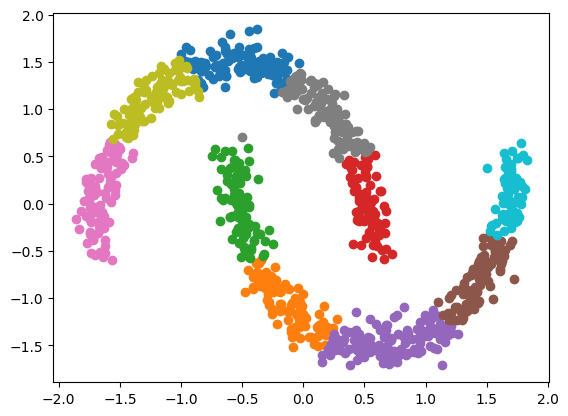

In [ ]:
raw_data_scatter1 = raw_data_scatter[raw_data_scatter['x'] == 0]
plt.scatter(raw_data_scatter1[0], raw_data_scatter1[1])
raw_data_scatter2 = raw_data_scatter[raw_data_scatter['x'] == 1]
plt.scatter(raw_data_scatter2[0], raw_data_scatter2[1])
raw_data_scatter3 = raw_data_scatter[raw_data_scatter['x'] == 2]
plt.scatter(raw_data_scatter3[0], raw_data_scatter3[1])
raw_data_scatter4 = raw_data_scatter[raw_data_scatter['x'] == 3]
plt.scatter(raw_data_scatter4[0], raw_data_scatter4[1])
raw_data_scatter5 = raw_data_scatter[raw_data_scatter['x'] == 4]
plt.scatter(raw_data_scatter5[0], raw_data_scatter5[1])
raw_data_scatter6 = raw_data_scatter[raw_data_scatter['x'] == 5]
plt.scatter(raw_data_scatter6[0], raw_data_scatter6[1])
raw_data_scatter7 = raw_data_scatter[raw_data_scatter['x'] == 6]
plt.scatter(raw_data_scatter7[0], raw_data_scatter7[1])
raw_data_scatter8 = raw_data_scatter[raw_data_scatter['x'] == 7]
plt.scatter(raw_data_scatter8[0], raw_data_scatter8[1])
raw_data_scatter9 = raw_data_scatter[raw_data_scatter['x'] == 8]
plt.scatter(raw_data_scatter9[0], raw_data_scatter9[1])
raw_data_scatter10 = raw_data_scatter[raw_data_scatter['x'] == 9]
plt.scatter(raw_data_scatter10[0], raw_data_scatter10[1])
plt.show()

In [ ]:
silhouette_avg = silhouette_score(raw_data, km.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.503


# Aglomeracyjna

In [ ]:
linkages = ["ward", "complete", "average", "single"]

max_silhouette = 0
best_linkage = 0
best_n_clusters = 0


for j in linkages:
  for i in range(2, 15):

    agg_clust = AgglomerativeClustering(n_clusters=i, linkage=j)
    agg_clust.fit(raw_data)

    silhouette_avg = silhouette_score(raw_data, agg_clust.labels_)
    if silhouette_avg > max_silhouette:
      max_silhouette = silhouette_avg
      best_linkage = j
      best_n_clusters = i

print(max_silhouette, best_n_clusters, best_linkage)

0.4888068984604873 2 complete


In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_clust.fit(raw_data)

AgglomerativeClustering(linkage='complete')

In [ ]:
labels = model.labels_
raw_data_scatter = pd.DataFrame(raw_data)
raw_data_scatter['x'] = labels
raw_data_scatter

,0,1,x
0,-1.004196,1.154097,0
1,-1.757214,0.249628,0
2,1.326731,-0.923776,1
3,0.582999,-0.113334,0
4,1.792016,0.183571,1
...,...,...,...
995,-0.875496,1.470151,0
996,0.261172,0.753221,0
997,1.530026,-0.620224,1
998,-1.736907,-0.522161,0


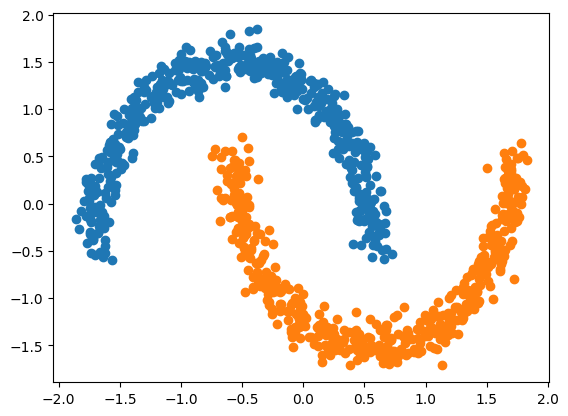

In [ ]:
raw_data_scatter1 = raw_data_scatter[raw_data_scatter['x'] == 0]
plt.scatter(raw_data_scatter1[0], raw_data_scatter1[1])
raw_data_scatter2 = raw_data_scatter[raw_data_scatter['x'] == 1]
plt.scatter(raw_data_scatter2[0], raw_data_scatter2[1])
plt.show()

# Gęstościowa (DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN

db_x = np.arange(0.1, 0.5, 0.1)
db_y = range(2, 15)

max_silhouette = 0
best_eps = 0
best_samples = 0

silhouette_sc = 0


for i in db_x:
  for j in db_y:
    model = DBSCAN(eps=i, min_samples=j)
    model.fit(raw_data)
    silhouette_sc = silhouette_score(raw_data, model.labels_)
    if silhouette_sc > max_silhouette:
      max_silhouette = silhouette_sc
      best_eps = i
      best_samples = j


print(max_silhouette, best_eps, best_samples)

0.387174343451837 0.2 2


In [ ]:
model = DBSCAN(eps=0.2, min_samples=2)
model.fit(raw_data)

DBSCAN(eps=0.2, min_samples=2)

In [ ]:
labels = model.labels_
raw_data_scatter = pd.DataFrame(raw_data)
raw_data_scatter['x'] = labels
raw_data_scatter

,0,1,no_clutter
0,-1.004196,1.154097,0
1,-1.757214,0.249628,0
2,1.326731,-0.923776,1
3,0.582999,-0.113334,0
4,1.792016,0.183571,1
...,...,...,...
995,-0.875496,1.470151,0
996,0.261172,0.753221,0
997,1.530026,-0.620224,1
998,-1.736907,-0.522161,0


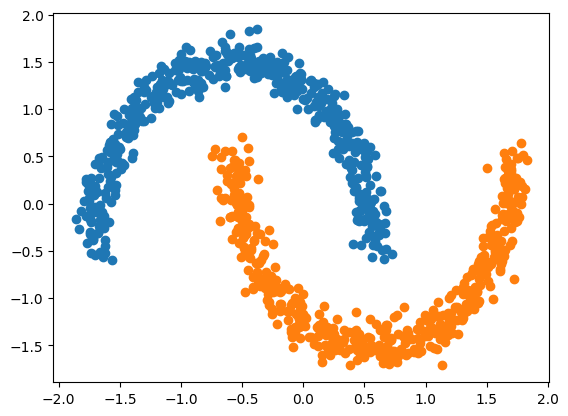

In [ ]:
raw_data_scatter1 = raw_data_scatter[raw_data_scatter['x'] == 0]
plt.scatter(raw_data_scatter1[0], raw_data_scatter1[1])
raw_data_scatter2 = raw_data_scatter[raw_data_scatter['x'] == 1]
plt.scatter(raw_data_scatter2[0], raw_data_scatter2[1])
plt.show()

# Podsumowanie

Po porównaniu silhouette score wszystkich algorytmów dochodzimy do wniosku że najwyższe wyniki osiągneły kmeans oraz kmedoids. Niewiele niższy wynik osiągęła klasteryzacja aglomeracyjna oraz sporo niżej DBSCAN.
Jednak patrząc na wykresy widzimy, że w naszym konkretnym przypadku najlepiej poradziły sobie DBSCAN oraz klasteryzacja aglomeracyjna ponieważ mimo gorszych wyników silhouette nie dzieliły księżycy na mniejsze klastry.




